In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [3]:
from google.colab import files
uploaded = files.upload()

Saving train to train (1)


In [4]:
for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "train" with length 155249918 bytes


In [5]:
from google.colab import files
uploaded = files.upload()

Saving test to test (2)


In [6]:
for fn_test in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn_test, length=len(uploaded[fn_test])))

User uploaded file "test" with length 31049707 bytes


In [0]:
# load the image from cifar-100
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict


In [0]:
# f = unpickle("/Users/Wendy/Fall2018/397/cifar-100-python/train")
# f_test = unpickle("/Users/Wendy/Fall2018/397/cifar-100-python/test")
f = unpickle(fn)
f_test = unpickle(fn_test)

In [9]:
#create 2 classes from label 0 and label 6->honey bees
X_train = []
X_test = []
Y_train = []
Y_test = []
j = 0
for i in range(len(f['fine_labels'])):
    if(f['fine_labels'][i] == 0):
        X_train.append(f['data'][i])
        Y_train.append(0)
    elif(f['fine_labels'][i] == 6):
        X_train.append(f['data'][i])
        Y_train.append(1)

for i in range(len(f_test['fine_labels'])):
    if(f_test['fine_labels'][i] == 0):
        X_test.append(f_test['data'][i])
        Y_test.append(0)
    elif(f_test['fine_labels'][i] == 6):
        X_test.append(f_test['data'][i])
        Y_test.append(1)
        if j == 0:
            print f_test['filenames'][i]
            print i
        j+=1
        
X_train = np.array(X_train)/255.0
X_test = np.array(X_test)/255.0
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
        

honeybee_s_001239.png
51


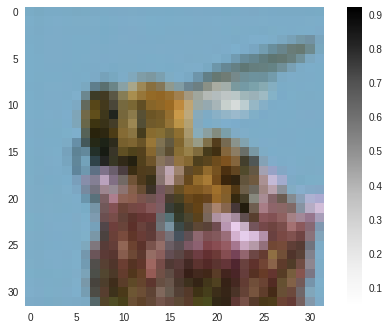

In [10]:
#inspect the image

# inspect X_train[0]
#reshape the list into 2D matrix
inspect = np.zeros((32,32,3))
for i in range(32):
    for j in range(32):
        inspect[j][i][0] = X_test[1][j*32+i]
        inspect[j][i][1] = X_test[1][j*32+i+1024]
        inspect[j][i][2] = X_test[1][j*32+i+2048]
plt.figure()
plt.imshow(inspect)
plt.colorbar()
plt.grid(False)

In [0]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
import time
start_time = time.time()
model.fit(X_train, Y_train, epochs=30)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/30
1000/1000 [==============================] - 1s 815us/step - loss: 1.0546 - acc: 0.6090
Epoch 2/30
1000/1000 [==============================] - 0s 117us/step - loss: 0.4473 - acc: 0.7880
Epoch 3/30
1000/1000 [==============================] - 0s 116us/step - loss: 0.3740 - acc: 0.8390
Epoch 4/30
1000/1000 [==============================] - 0s 130us/step - loss: 0.3621 - acc: 0.8380
Epoch 5/30
1000/1000 [==============================] - 0s 116us/step - loss: 0.3676 - acc: 0.8310
Epoch 6/30
1000/1000 [==============================] - 0s 116us/step - loss: 0.3242 - acc: 0.8530
Epoch 7/30
1000/1000 [==============================] - 0s 114us/step - loss: 0.2953 - acc: 0.8660
Epoch 8/30
1000/1000 [==============================] - 0s 120us/step - loss: 0.3034 - acc: 0.8690
Epoch 9/30
1000/1000 [==============================] - 0s 121us/step - loss: 0.3051 - acc: 0.8700
Epoch 10/30
1000/1000 [==============================] - 0s 120us/step - loss: 0.2874 - acc: 0.8830
Epoch 11/

In [15]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('Test accuracy:', test_acc)

200/200 [==============================] - 0s 337us/step
('Test accuracy:', 0.865)


In [0]:
Y_pred = model.predict(X_test)

In [17]:
Y_pred[0]

array([9.9980658e-01, 1.9348934e-04], dtype=float32)

In [0]:
class_names = ['others', 'bee']

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  inspect = np.zeros((32,32,3))
  for i in range(32):
    for j in range(32):
        inspect[j][i][0] = img[j*32+i]
        inspect[j][i][1] = img[j*32+i+1024]
        inspect[j][i][2] = img[j*32+i+2048]
  
  plt.imshow(inspect, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

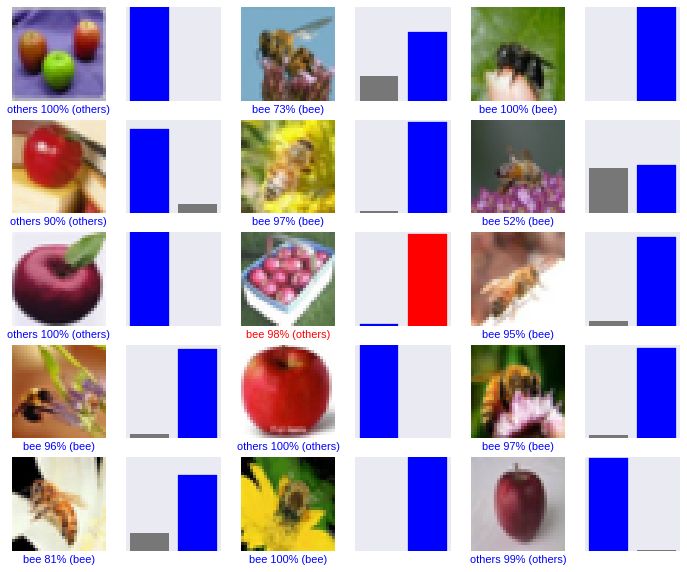

In [20]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, Y_pred, Y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, Y_pred, Y_test)

